In [39]:
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.mlab as mlab
#import scipy.signal as sig
from scipy import stats
#from scipy import interpolate
#import numpy.ma as ma
#import csv
#from numpy import genfromtxt
#from mpl_toolkits.basemap import Basemap

import general_functions as gf
reload(gf)


<module 'general_functions' from '/Users/eabarnes/GoogleDrive/WORK/SOFTWARE/PYTHON/general_functions.pyc'>

In [47]:

# length of true population time series
total_length = 100000

# sample size
N = 250

# create normal distributions
#xf = np.random.normal(0.,1.,size=total_length)
#yf = np.random.normal(0.,1.,size=total_length)

# create lognormal distributions
xf = np.random.lognormal(0.,1.,size=total_length)
yf = np.random.lognormal(0.,1.,size=total_length)

# create uniform distributions
#xf = np.random.uniform(-1.,1.,size = total_length)
#yf = np.random.uniform(-1.,1.,size = total_length)



In [48]:

r = np.empty((2000,))

print 'looping through instances...'

for iloop, val in enumerate(r):
    irandval_x = np.random.randint(low = 0, high = len(xf), size = N)
    irandval_y = np.random.randint(low = 0, high = len(yf), size = N)
    
    r[iloop] = stats.pearsonr(xf[irandval_x],yf[irandval_y])[0]
    
tr = (r * np.sqrt(N-2))/(np.sqrt(1-r**2))    



looping through instances...


------------------------------------------------
N = 250: NormalDist = 2.5%, Actual = 4.0%
------------------------------------------------


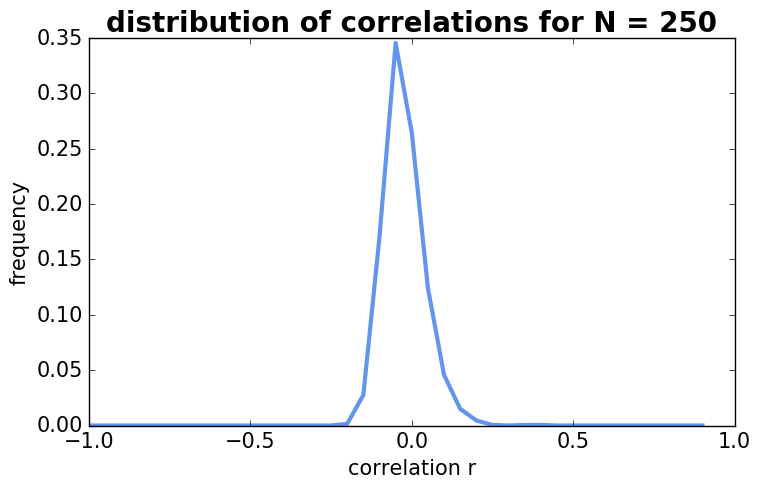

In [49]:
j = np.where(tr>=stats.t.ppf(0.975,N-2))

a = np.size(j)/float(np.size(tr))

print '------------------------------------------------'
print 'N = ' + str(N) + ': NormalDist = 2.5%, Actual = ' + str(gf.round_to_nearest(a,.01)*100.) + '%'
print '------------------------------------------------'

#%%
xinc= np.arange(-1.,1.,0.05)

gf.cfig(1, fig_width= 50, fig_height = 30)

hx = np.histogram(r,xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(r)),'-',color='cornflowerblue')
 
plt.xlabel('correlation r')
plt.ylabel('frequency')
plt.title('distribution of correlations for N = ' + str(N))

plt.show()

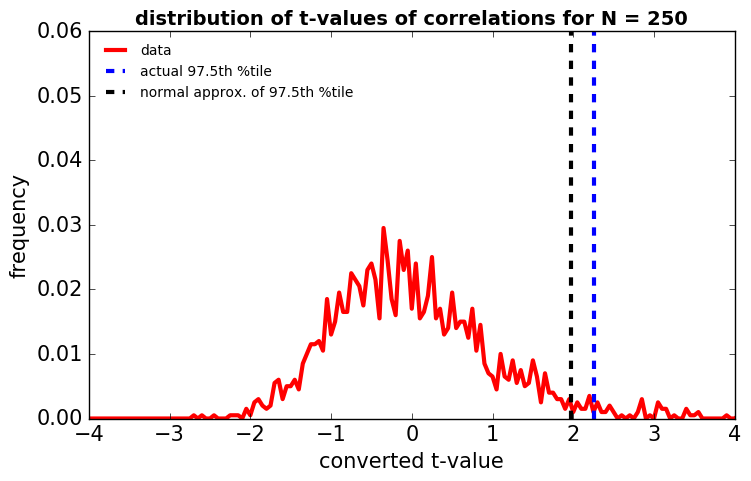

In [50]:
xinc= np.arange(-5.,5.,0.05)

gf.cfig(2, fig_width= 50, fig_height = 30)

hx = np.histogram(tr,xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(tr)),'-',color='red', label = 'data')

plt.plot(np.ones((2,1))*np.percentile(tr,97.5),[0.0, 0.1],'--b', label = 'actual 97.5th %tile')
plt.plot(np.ones((2,1))*stats.t.ppf(0.975,N-2),[0.0, 0.1],'--k', label = 'normal approx. of 97.5th %tile')

plt.xlabel('converted t-value')
plt.ylabel('frequency')

plt.xlim(-4,4)
plt.ylim(0.0,0.06)

plt.title('distribution of t-values of correlations for N = ' + str(N), fontsize = 14)

plt.legend(loc = 'upper left', frameon = 0, fontsize = 10)

plt.show()